In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, mean_absolute_error
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
def wrangle (filepath):
    #Read the data
    df = pd.read_csv(filepath)
    
    #Drop NaN columns
    df.dropna()
    
    print(df.info())
    print(df.describe())
    
    return df

In [3]:
df = wrangle('iris_dataset.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class_name    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = df.iloc[:,:4]
Y = df.iloc[:,4]
print(X)
print(Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class_name, Length: 150, dtype: 

In [6]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size= 0.20, random_state= 45)

In [7]:
clf = RandomForestClassifier(max_depth= 4, random_state= 0)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [8]:
y_pred = clf.predict(x_test)

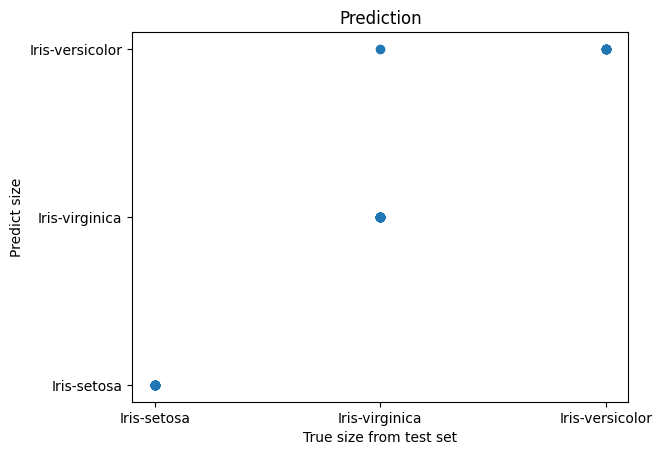

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('True size from test set')
plt.ylabel('Predict size')
plt.title('Prediction')
plt.show()

In [10]:
feat_important = clf.feature_importances_

In [11]:
print('Feat Important: ', str(feat_important))

Feat Important:  [0.08653437 0.03218227 0.4233311  0.45795225]


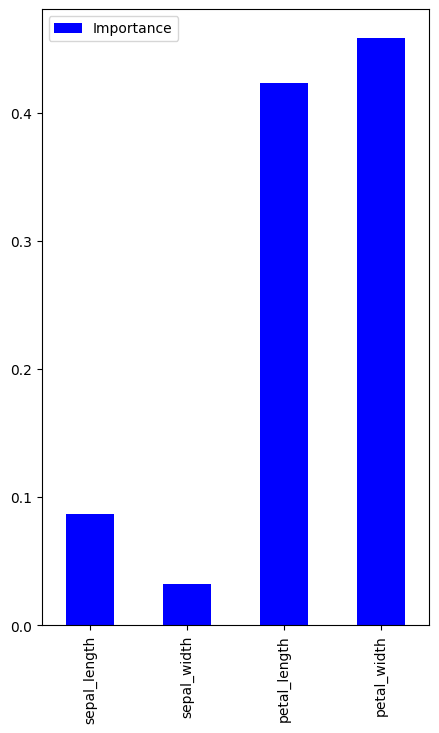

In [12]:
feat_important = pd.DataFrame(clf.feature_importances_, index= X.columns, columns=['Importance'])
feat_important.sort_values(by='Importance', ascending= False)
feat_important.plot(kind='bar', figsize=(5,8), color='blue')
plt.show()

In [13]:
clf.score(X_train, Y_train)

1.0

In [14]:
clf.score(x_test, y_test)

0.9666666666666667

In [15]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [16]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 11]], dtype=int64)